In [1]:
# General imports
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Data Science
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from utils.analysis import load_results, get_best, are_different
from utils.analysis import list_best_configurations, get_best_costly_organised
from utils.plotting import plot_image

In [2]:
data = load_results()

## Best Result by Algorithm

In [19]:
get_best(data, "Naive Bayes")

,nlp,algorithm,cost_ratio,precision,recall
25,Combination,Naive Bayes,25,44.419897,100


In [4]:
get_best(data, "SVM")

,nlp,algorithm,cost_ratio,precision,recall
54,Combination,SVM,10,0.537471,0.989804


In [5]:
get_best(data, "Random Forest")

,nlp,algorithm,cost_ratio,precision,recall
45,Combination,Random Forest,25,0.790091,0.935033


In [6]:
get_best(data, "Logistic")

,nlp,algorithm,cost_ratio,precision,recall
19,Combination,Logistic,1000000,0.344986,1
79,None,Logistic,1000000,0.344986,1
139,Stemming,Logistic,1000000,0.344986,1


In [7]:
get_best(data, "Perceptron")

,nlp,algorithm,cost_ratio,precision,recall
39,Combination,Perceptron,1000000,0.344986,1
99,None,Perceptron,1000000,0.344986,1
159,Stemming,Perceptron,1000000,0.344986,1


## Analyzing preprocessing techniques

### Steming vs bigrams vs combination

In [7]:
are_different(data, 'nlp', 'precision')
print("=" * 30)
are_different(data, 'nlp', 'recall')

None 0.613094528
Stemming 0.61239023
Combination 0.600275024

NON Parametric test

Statistically NON-significant different results between None and Stemming
Statistically NON-significant different results between None and Combination
Statistically NON-significant different results between Stemming and Combination
None 0.952829404
Stemming 0.951656892
Combination 0.95213788

NON Parametric test

Statistically NON-significant different results between None and Stemming
Statistically NON-significant different results between None and Combination
Statistically NON-significant different results between Stemming and Combination


## Analyzing algorithms

In [8]:
are_different(data, 'algorithm', 'precision', threshold=0.001)
print("=" * 30)
are_different(data, 'algorithm', 'recall', threshold=0.001)

Naive Bayes 0.491114113333
Random Forest 0.84472952
SVM 0.67608418
Baseline 0.344986
Logistic 0.686019156667

NON Parametric test

Statistically significant different results between Naive Bayes and Random Forest
Statistically significant different results between Naive Bayes and SVM
Statistically significant different results between Naive Bayes and Baseline
Statistically significant different results between Naive Bayes and Logistic
Statistically significant different results between Random Forest and SVM
Statistically significant different results between Random Forest and Baseline
Statistically significant different results between Random Forest and Logistic
Statistically significant different results between SVM and Baseline
Statistically NON-significant different results between SVM and Logistic
Statistically significant different results between Baseline and Logistic
Naive Bayes 0.990417193333
Random Forest 0.891039183333
SVM 0.928881326667
Baseline 1.0
Logistic 0.95070259

NON 

    ### List best configurations

In [9]:
list_best_configurations(data)

,algorithm,cost,nlp,precision,recall
0,Baseline,2,Combination,0.344986,1.000000
0,Baseline,2,None,0.344986,1.000000
0,Baseline,2,Stemming,0.344986,1.000000
0,Logistic,1000000,Combination,0.344986,1.000000
0,Logistic,1000000,None,0.344986,1.000000
0,Logistic,1000000,Stemming,0.344986,1.000000
0,Naive Bayes,25,Combination,0.444199,1.000000
0,Naive Bayes,25,None,0.441965,1.000000
0,Naive Bayes,50,Stemming,0.401889,1.000000
0,Random Forest,25,Combination,0.790091,0.935033


In [3]:
recalls, precisions = get_best_costly_organised(data)

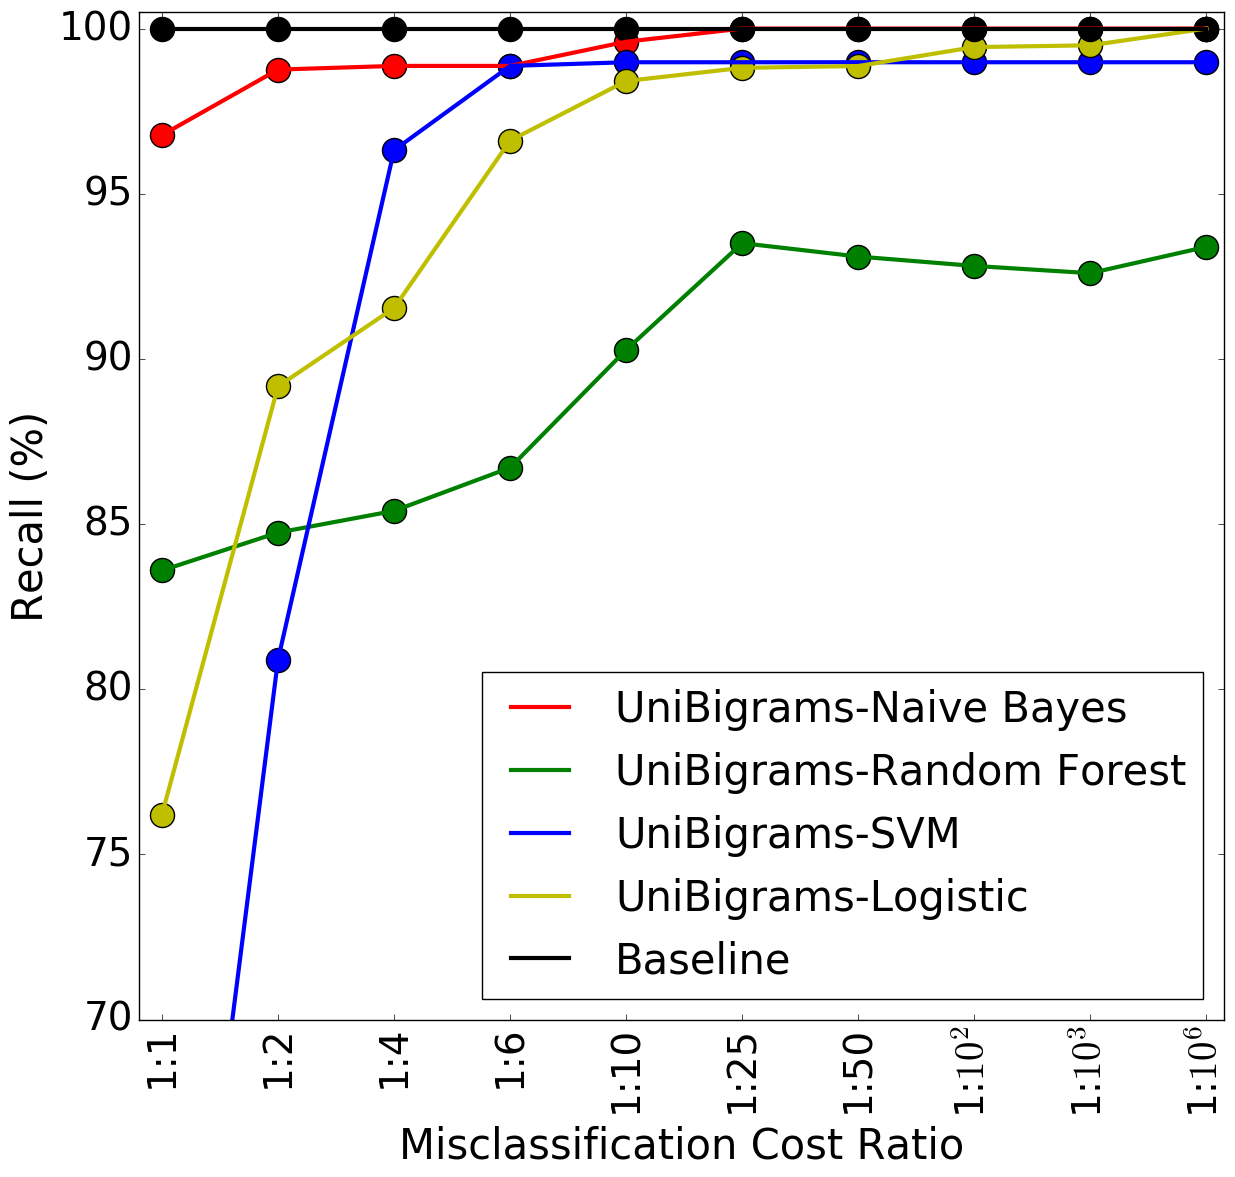

In [5]:
plot_image(recalls, title="RECALL", ylim = [70, 100.5], file_name="recall", ylabel="Recall (%)", 
           loc='lower righ', markers="<Do|")

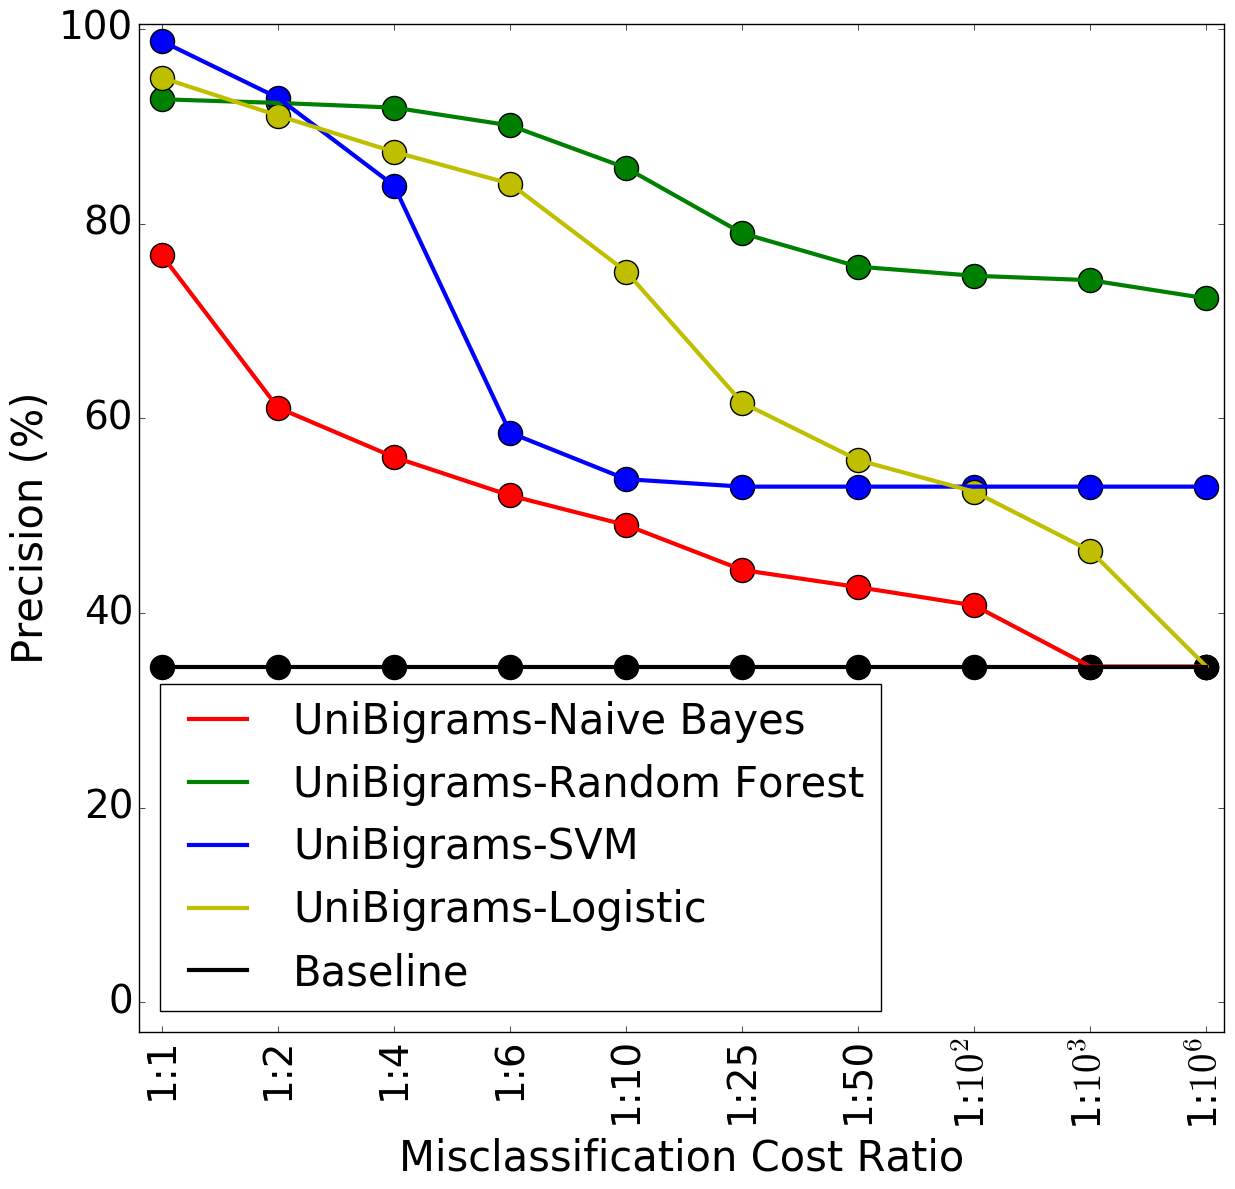

In [6]:
plot_image(precisions, title="RECALL", ylim = [-3, 100.5],  file_name="precision", ylabel="Precision (%)", 
           loc='lower righ', markers="<Do|")

In [29]:
d = data["denormalized"]
d1 = d.loc[(d["algorithm"] == "Naive Bayes") &
      (d["nlp"] == "Combination") &
      (d["cost_ratio"] == 25)]["precision"]

d2 = d.loc[(d["algorithm"] == "Naive Bayes") &
      (d["nlp"] == "None") &
      (d["cost_ratio"] == 25)]["precision"]

ttest_ind(d1, d2, equal_var=False)[1]

0.04344015526629165